In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
from pyclim_noresm.general_util_funcs import global_avg
import matplotlib
import matplotlib as mpl
import numpy as np
from tools import global_map
matplotlib.rcParams.update({'font.size': 14})

In [2]:
model_paths = {
    'CNRM-ESM2-1':'../results/piClim-2xdust/rad/SWDirectEff_piClim-2xdust_CNRM-ESM2-1_Ayear.nc',
    'EC-Earth3-AerChem':'../results/piClim-2xdust/rad/SWDirectEff_piClim-2xdust_EC-Earth3-AerChem_Ayear.nc',
    'NorESM2-LM':'../results/piClim-2xdust/rad/SWDirectEff_piClim-2xdust_NorESM2-LM_Ayear.nc',
    'UKESM1-0-LL':'../results/piClim-2xdust/rad/SWDirectEff_piClim-2xdust_UKESM1-0-LL_Ayear.nc',
    'MPI-ESM-1-2-HAM':'../results/piClim-2xdust/rad/SWDirectEff_piClim-2xdust_MPI-ESM-1-2-HAM_Ayear.nc'
}



In [3]:
dsets = []
for key,path in model_paths.items():
    ds = xr.open_dataset(path)

    ds = global_avg(ds['SWDirectEff'])
    ds = ds.assign_coords(year=range(1,len(ds.year)+1))
    ds = ds.to_dataset(name=f'{key}')
    dsets.append(ds)

In [4]:
ds = xr.merge(dsets)

df = ds.to_dataframe()

In [5]:
df['Multi-model'] = df.mean(axis=1)
mean_ERF = df.mean()
erf_std = df.std()



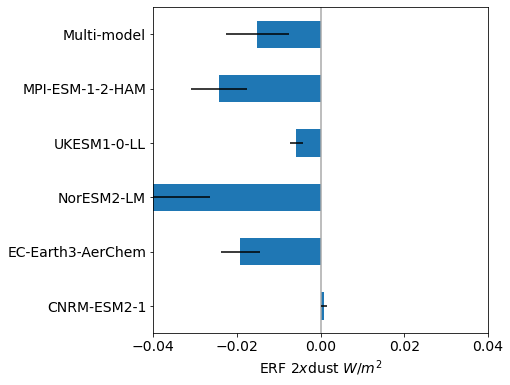

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axvline(color='darkgrey')
mean_ERF.plot.barh(ax=ax,xerr=erf_std)
ax.set_xlim(-0.04,0.04)
ax.set_xlabel('ERF 2$x$dust $W/m^2$')
plt.savefig('../figs/dust_SWDirect_radiative_effect.png', facecolor='w')

Most models does not show any forcing changes from a doubling of dust. Thus adding 3 more models does not change the previous conclusions.

In [7]:
dsets = {}
for key,path in model_paths.items():
    ds = xr.open_dataset(path)
    # ds = global_avg(ds['ERFt'])
    std = ds['SWDirectEff'].std(dim='year').to_dataset(name=f'{key}_std')
    mean = ds['SWDirectEff'].mean(dim='year').to_dataset(name=f'{key}')
    ds = xr.merge([std,mean])
    # ds = ds.to_dataset(name=f'{key}')
    dsets[key] =ds

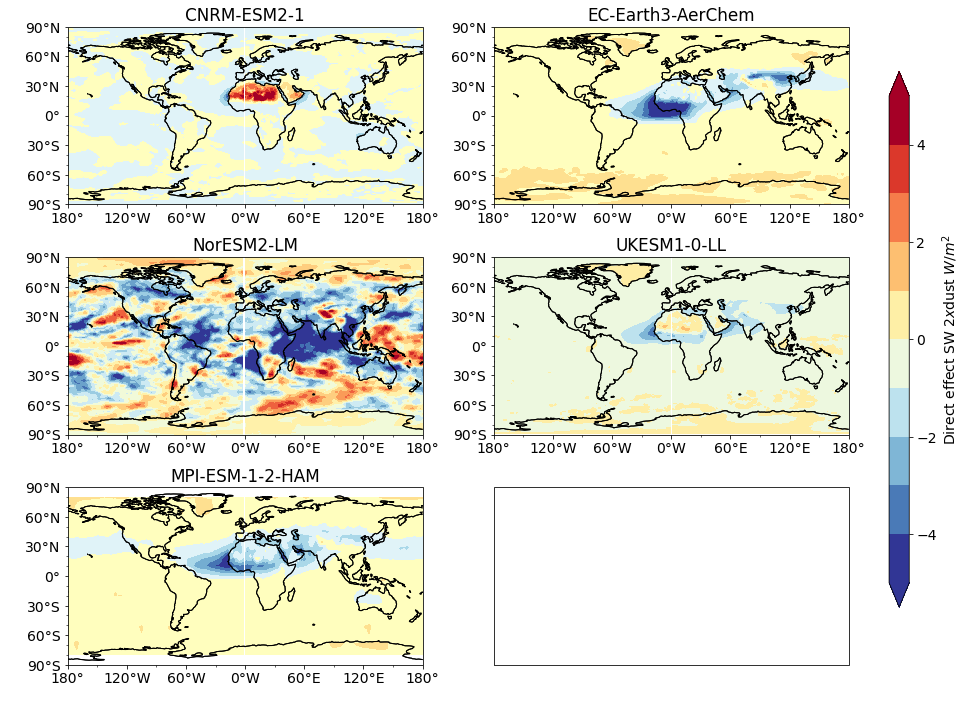

In [8]:
fig, ax = plt.subplots(ncols=2,nrows=3, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(14,12))
for key, ax_i in zip(dsets,ax.ravel()):
    dsets[key][key].plot.contourf(ax=ax_i,levels=np.linspace(-5,5,11),cmap='RdYlBu_r', add_colorbar=False)
    ax_i.coastlines()
    ax_i.set_title(key)
    global_map(ax_i)
cax = fig.add_axes([0.94,0.2,0.02,0.62])
cmap = mpl.cm.RdYlBu_r
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(-5,5,11),cmap.N),cmap), cax=cax, extend='both', 
             label='Direct effect SW 2$x$dust $W/m^2$')
plt.savefig('../figs/Dust_DirectSW_effects_CMIP6.png', dpi=144, facecolor='white')

## Clear Sky direct effect

In [9]:
model_paths = {
    'CNRM-ESM2-1':'../results/piClim-2xdust/rad/SWDirectEff_cs_piClim-2xdust_CNRM-ESM2-1_Ayear.nc',
    'EC-Earth3-AerChem':'../results/piClim-2xdust/rad/SWDirectEff_cs_piClim-2xdust_EC-Earth3-AerChem_Ayear.nc',
    'NorESM2-LM':'../results/piClim-2xdust/rad/SWDirectEff_cs_piClim-2xdust_NorESM2-LM_Ayear.nc',
    'UKESM1-0-LL':'../results/piClim-2xdust/rad/SWDirectEff_cs_piClim-2xdust_UKESM1-0-LL_Ayear.nc',
    'MPI-ESM-1-2-HAM':'../results/piClim-2xdust/rad/SWDirectEff_cs_piClim-2xdust_MPI-ESM-1-2-HAM_Ayear.nc'
}



In [10]:
dsets = []
for key,path in model_paths.items():
    ds = xr.open_dataset(path)

    ds = global_avg(ds['SWDirectEff_cs'])
    ds = ds.assign_coords(year=range(1,len(ds.year)+1))
    ds = ds.to_dataset(name=f'{key}')
    dsets.append(ds)

In [11]:
ds = xr.merge(dsets)

df = ds.to_dataframe()

In [12]:
df['Multi-model'] = df.mean(axis=1)
mean_ERF = df.mean()
erf_std = df.std()



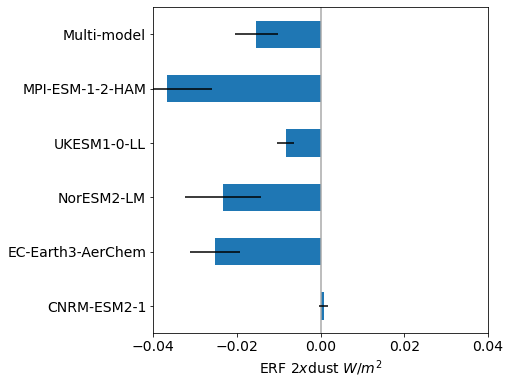

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
ax.axvline(color='darkgrey')
mean_ERF.plot.barh(ax=ax,xerr=erf_std)
ax.set_xlim(-0.04,0.04)
ax.set_xlabel('ERF 2$x$dust $W/m^2$')
plt.savefig('../figs/dust_SWDirect_radiative_effect.png', facecolor='w')

Most models does not show any forcing changes from a doubling of dust. Thus adding 3 more models does not change the previous conclusions.

In [14]:
dsets = {}
for key,path in model_paths.items():
    ds = xr.open_dataset(path)
    # ds = global_avg(ds['ERFt'])
    std = ds['SWDirectEff_cs'].std(dim='year').to_dataset(name=f'{key}_std')
    mean = ds['SWDirectEff_cs'].mean(dim='year').to_dataset(name=f'{key}')
    ds = xr.merge([std,mean])
    # ds = ds.to_dataset(name=f'{key}')
    dsets[key] =ds

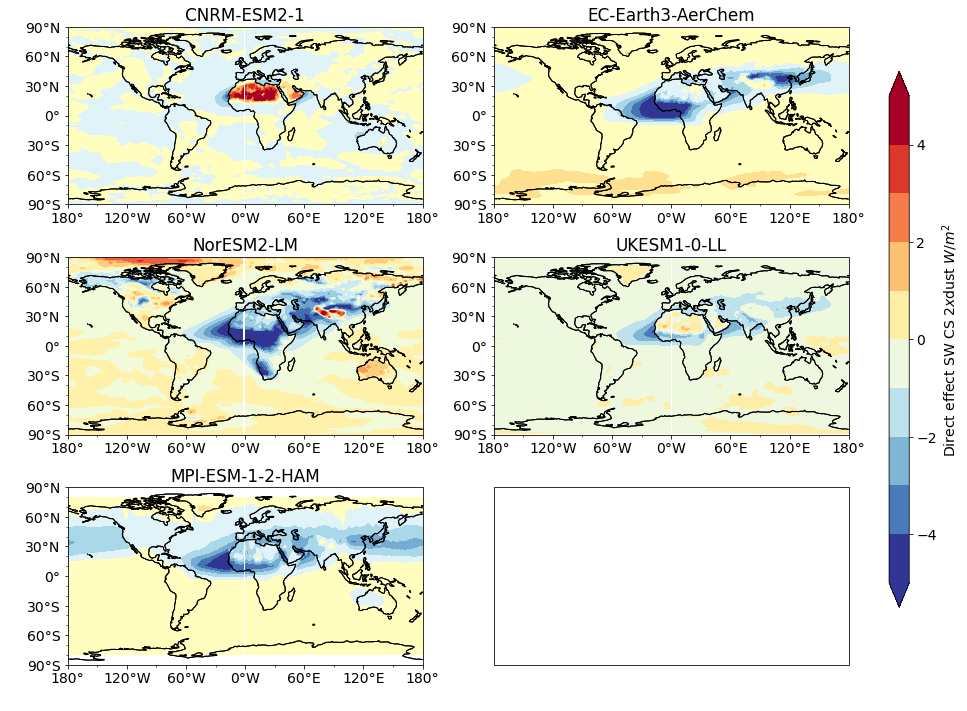

In [15]:
fig, ax = plt.subplots(ncols=2,nrows=3, subplot_kw={'projection':ccrs.PlateCarree()}, figsize=(14,12))
for key, ax_i in zip(dsets,ax.ravel()):
    dsets[key][key].plot.contourf(ax=ax_i,levels=np.linspace(-5,5,11),cmap='RdYlBu_r', add_colorbar=False)
    ax_i.coastlines()
    ax_i.set_title(key)
    global_map(ax_i)
cax = fig.add_axes([0.94,0.2,0.02,0.62])
cmap = mpl.cm.RdYlBu_r
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(-5,5,11),cmap.N),cmap), cax=cax, extend='both', 
             label='Direct effect SW CS 2$x$dust $W/m^2$')
plt.savefig('../figs/Dust_DirectSW_effects_cs_CMIP6.png', dpi=144, facecolor='white')